## Descarga y formatting del CSV de los datos

In [2]:
import cv2
import numpy
import pandas
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [27]:
data = pandas.read_csv("dataset.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15459188,https://www.airbnb.com/rooms/15459188,20170407214050,2017-04-08,Paseo De Gracia I (433),"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,6.0,10.0,8.0,NaN,NaN,strict,92,0.39,"41.39161588920901,2.1681677061165425","Host Has Profile Pic,Host Identity Verified,Is..."
1,13184463,https://www.airbnb.com/rooms/13184463,20170407214050,2017-04-08,"Rooftop 2 terraces full of art, style and views","Our place is In the cross between Born, Barce...",The views above Barcelona are unique. The styl...,"Our place is In the cross between Born, Barce...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.99,"41.38136867557121,2.1808743514708038","Host Has Profile Pic,Host Identity Verified,Is..."
2,17115175,https://www.airbnb.com/rooms/17115175,20170407214050,2017-04-08,Flat close to Plaza España - Eixample,"- Comfortable and clean double bedroom, with a...",NaN,"- Comfortable and clean double bedroom, with a...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.79,"41.38600531434205,2.1433972223397064","Host Has Profile Pic,Host Identity Verified,Is..."
3,1266363,https://www.airbnb.com/rooms/1266363,20170407214050,2017-04-08,Picasso Suites 3.1 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,HUTB-005631,NaN,strict,24,1.97,"41.39718124558758,2.1692269203074326","Host Has Profile Pic,Host Identity Verified,Is..."
4,15458789,https://www.airbnb.com/rooms/15458789,20170407214050,2017-04-08,Paseo de Gracia E,"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,92,0.75,"41.39098987326012,2.1685873390693984","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,15458474,https://www.airbnb.com/rooms/15458474,20170407214050,2017-04-08,Paseo de Gracia Deluxe J,"Unique apartment in vibrant neighborhoods, car...",Paseo de Gracia Apartments are located in a wo...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,4.0,4.0,2.0,NaN,NaN,strict,92,0.23,"41.391140480799066,2.169538210611844","Host Has Profile Pic,Host Identity Verified,Is..."
13997,2545534,https://www.airbnb.com/rooms/2545534,20170407214050,2017-04-08,Luxury apartment 1,Luminoso apartamento situado en pleno centro d...,"Se trata de un apartamento cómodo, acogedor, l...",Luminoso apartamento situado en pleno centro d...,none,El Eixample es el barrio por excelencia típico...,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.78,"41.39818573733248,2.1702909974460276","Host Has Profile Pic,Host Identity Verified,Is..."
13998,15879739,https://www.airbnb.com/rooms/15879739,20170407214050,2017-04-08,Paseo del Borne Loft C,"Unique apartment in vibrant neighborhoods, car...",Borne Loft is located in a marvelous privilege...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92,NaN,"41.38351862723236,2.1833714999874574","Host Has Profile Pic,Host Identity Verified,Is..."
13999,1505984,https://www.airbnb.com/rooms/1505984,20170407214050,2017-04-08,Stylish 3Br Apt. with Balcony,Stylish low cost boutique apartment to accommo...,Stylish low cost apartment to accommodate up t...,Stylish low cost boutique apartment to accommo...,none,The apartment is located in the district of Le...,...,10.0,9.0,9.0,HUTB-012417 77,NaN,moderate,14,

In [28]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## Descarga de imágenes

In [29]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(data_descargada: pd.DataFrame,
                            save_path: str = 'imagenes',
                            canvas: tuple = (224, 224)) -> tuple:
    """Recorre el DataFrame data_descargada, lee las imágenes desde la carpeta 'imagenes'
    usando el valor de 'id' para el nombre de los archivos, y devuelve las imágenes leídas
    y sus índices en una lista.

    Args:
        data_descargada: DataFrame que contiene la columna 'id'.
        save_path: Carpeta donde se almacenan las imágenes (por defecto 'imagenes').
        canvas: Dimensiones a las que se redimensionarán las imágenes (por defecto 224x224).

    Returns:
        A tuple of:
            - images: Arreglo con las imágenes leídas.
            - downloaded_idxs: Lista de los índices de las imágenes que se han leído correctamente.
    """
    downloaded_idxs = []  # Lista para almacenar los índices de las imágenes leídas correctamente
    images = []  # Lista para almacenar las imágenes leídas

    for idx, row in data_descargada.iterrows():
        img_id = row['id']  # Obtener el 'id' de la fila
        img_filename = f"{img_id}.jpg"  # Usar 'id' para formar el nombre del archivo de la imagen
        img_path = os.path.join(save_path, img_filename)  # Ruta completa del archivo de imagen

        if os.path.exists(img_path):  # Verificar si el archivo de la imagen existe
            # Leer la imagen usando OpenCV
            img = cv2.imread(img_path)

            # Redimensionar la imagen si es necesario
            img = cv2.resize(img, (canvas[0], canvas[1]))

            # Agregar la imagen al arreglo
            images.append(img)

            # Agregar el índice al arreglo de índices descargados
            downloaded_idxs.append(idx)

    # Convertir la lista de imágenes en un arreglo de NumPy
    images = np.array(images)

    return images, downloaded_idxs



images, downloaded_idxs = load_images_from_folder(data_descargada)

Normalización y conversión en el rango [0, 1]

**RECORDAD SEÑALAR LA COLUMNA ADECUADA**

In [30]:
images, idxs = download_images(data['Thumbnail Url'], max_imgs=100)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


(61, 224, 224, 3)

Filtrado acorde en los demás datos

In [31]:
filtered_data = data.iloc[idxs]
filtered_data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15459188,https://www.airbnb.com/rooms/15459188,20170407214050,2017-04-08,Paseo De Gracia I (433),"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,6.0,10.0,8.0,NaN,NaN,strict,92,0.39,"41.39161588920901,2.1681677061165425","Host Has Profile Pic,Host Identity Verified,Is..."
1,13184463,https://www.airbnb.com/rooms/13184463,20170407214050,2017-04-08,"Rooftop 2 terraces full of art, style and views","Our place is In the cross between Born, Barce...",The views above Barcelona are unique. The styl...,"Our place is In the cross between Born, Barce...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.99,"41.38136867557121,2.1808743514708038","Host Has Profile Pic,Host Identity Verified,Is..."
2,17115175,https://www.airbnb.com/rooms/17115175,20170407214050,2017-04-08,Flat close to Plaza España - Eixample,"- Comfortable and clean double bedroom, with a...",NaN,"- Comfortable and clean double bedroom, with a...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.79,"41.38600531434205,2.1433972223397064","Host Has Profile Pic,Host Identity Verified,Is..."
4,15458789,https://www.airbnb.com/rooms/15458789,20170407214050,2017-04-08,Paseo de Gracia E,"Unique apartment in vibrant neighborhoods, car...","Its high ceilings, wooden floors, large window...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,92,0.75,"41.39098987326012,2.1685873390693984","Host Has Profile Pic,Host Identity Verified,Is..."
6,10378650,https://www.airbnb.com/rooms/10378650,20170407214050,2017-04-08,Sagrada famlia's Sunshine apartment,Bright and centric apartment just 50mts away f...,"Lovely & Bright apartment, right next to Sagra...",Bright and centric apartment just 50mts away f...,none,"Located on a nice, clean, quiet and authentic ...",...,10.0,10.0,9.0,NaN,NaN,strict,1,3.63,"41.408073471589645,2.172669055152655","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,16105852,https://www.airbnb.com/rooms/16105852,20170407214050,2017-04-08,Sagrada Familia Apartment D,"Unique apartment in vibrant neighborhoods, car...",Despite instant access to one of Europe’s most...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,8.0,10.0,10.0,NaN,NaN,strict,92,0.43,"41.40374635755522,2.171827634570173","Host Has Profile Pic,Host Identity Verified,Is..."
93,15445117,https://www.airbnb.com/rooms/15445117,20170407214050,2017-04-08,Sagrada Familia Apartment F,"Unique apartment in vibrant neighborhoods, car...",Next to the world famous Sagrada Familia you w...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,10.0,8.0,10.0,NaN,NaN,strict,92,0.38,"41.40333666420401,2.1736309047665303","Host Has Profile Pic,Host Identity Verified,Is..."
94,5247934,https://www.airbnb.com/rooms/5247934,20170315084710,2017-03-15,CAN RE1 Apartment w/ ROOFTOP TERRACE & BBQ,This little flat in Palma's enchanting and pic...,This little apartment in Palma Old town next t...,This little flat in Palma's enchanting and pic...,none,The apartment is in Palma Old town which is su...,...,9.0,10.0,9.0,NaN,NaN,super_strict_60,63,2.77,"39.571481341253204,2.6509233570493707","Host Has Profile Pic,Host Identity Verified,Re..."
97,13952963,https://www.airbnb.com/rooms/13952963,20170315084710,2017-03-15,Habitacion en palma con patio trasero,"Lugares de interés: transporte público, el cen...",NaN,"Lugares de interés: transporte público, el cen...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,2,0.28,"39.582400551378186,2.6684647482204484","Host Has Profi

## Guardado de los datos para posterior uso/selección

In [8]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 238K Jul  5 15:39 filtered_data.csv
-rw-r--r-- 1 root root  36M Jul  5 15:39 images.npy


In [15]:
# Comprobamos a abrirlos de nuevo
saved_data = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = numpy.load("/content/drive/MyDrive/images.npy")
saved_data.shape, saved_imgs.shape

((61, 89), (61, 224, 224, 3))

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<Axes: >

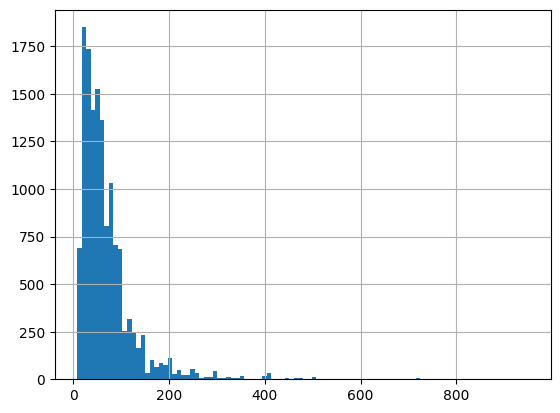

In [35]:
data['Price'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [37]:
data['Price'].describe()

count    13990.000000
mean        71.515154
std         67.863596
min          9.000000
25%         32.000000
50%         55.000000
75%         85.000000
max        950.000000
Name: Price, dtype: float64

<Axes: >

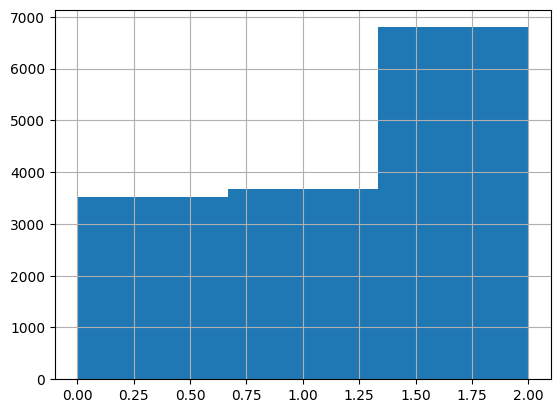

In [39]:
y_class = []
for y in data['Price']:
  if y <= 32:
    y_class.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)